# Ch. 3: Visualizing Data
Notes on "Data Science from Scratch" by Joel Grus
- Create a Kaggle account and get the set of training data [here](https://www.kaggle.com/c/titanic/data?train.csv)
- I'll modify examples in the book to plot the Titanic training data

In [17]:
# Load the data using pandas
import pandas as pd
pd.options.display.max_rows=6                # this makes pandas display first/last 3 rows of data set

path_to_data_file = "data/titanic/train.csv" # substitute with local path to your "train.csv" file
df = pd.read_csv(path_to_data_file)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.7500,NaN,Q


In [18]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [23]:
df['Title'] = df['Name'].str.extract('([A-Za-z ]*)\.')

In [24]:
df['Title']

0         Mr
1        Mrs
2       Miss
       ...  
888     Miss
889       Mr
890       Mr
Name: Title, dtype: object

## `matplotlib`
- Use `matplotlib.pyplot` module for plotting in this book
- Good for basic plotting, but you'll probably want to also use other tools for visualizations (see section "For Further Exploration")

Let's make a simple line chart.  Line charts are common for data where each value on the x-axis has a unique y-value associated with it.  For example, use a line chart to plot the price of a stock as a function of time.

PassengerId is the only column (= variable = feature) with unique values, so let's plot PassengerId on the x-axis and Fare on the y-axis.

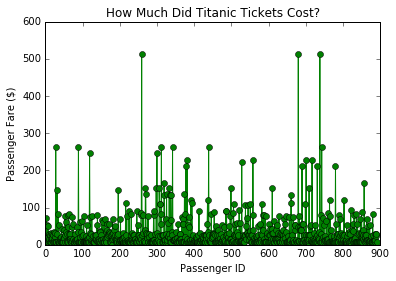

In [5]:
# Simple Line Plot
%matplotlib inline
from matplotlib import pyplot as plt

# Create a line chart, age on x-axis, fare on y-axis
plt.plot(df.PassengerId, df.Fare, color='green', marker='o', linestyle='solid')

# Add a title
plt.title("How Much Did Titanic Tickets Cost?")

# Add labels to the x- and y-axes
plt.xlabel("Passenger ID")
plt.ylabel("Passenger Fare ($)")

plt.show()

We don't know how Passenger ID's were assigned, but we could guess that perhaps the first passengers to purchase tickets were assigned 0, 1, 2, ... through the laste passenger to purchase a ticket: 891.  If this is true then PassengerId could be a proxy (perhaps a bad one) for time.  We might expect ticket prices to be higher for passengers with larger PassengerId values (who assumedly purchased tickets closer to departure), but that is not apparent from this plot.  

Let's change a few things in this plot and remove the line which isn't really showing anything.

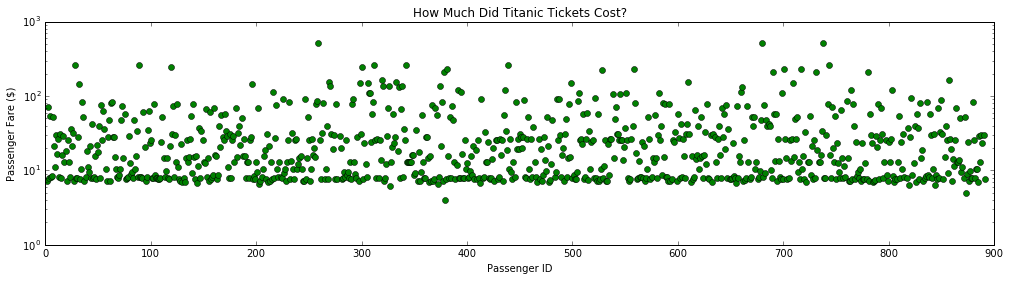

In [29]:
# Make a 17 inch by 4 inch figure
plt.figure(figsize=(17,4))

# Plot logarithmic y axis & remove solid line
plt.semilogy(df.PassengerId, df.Fare, color='green', marker='o', linestyle='')
#plt.plot(df.PassengerId, df.Fare, color='green', marker='o', linestyle='')

plt.title("How Much Did Titanic Tickets Cost?")

plt.xlabel("Passenger ID")
plt.ylabel("Passenger Fare ($)")

plt.show()

From this plot it looks like there's a lower limit to ticket prices around $7 - $8 with one passenger in particular who may have paid closer to $5 (we should always consider whether anomalous points are correct, though).

Who were the three passengers who paid over $500?

## Bar Charts

In [56]:
from collections import Counter

xs = df.Embarked.unique()
c = Counter(list(df.Survived))
print c
print float(c[0]) / (c[0] + c[1])
ys = [0, 0, 0, 0]
#for (i, row) in df.iterrows():
#    print row.Embarked
#for i, loc in enumerate(df.Embarked):
#    print i, loc, df.

Counter({0: 549, 1: 342})
0.616161616162


In [ ]:
# Bars are by default width 0.8, so we'll add 0.1 to the left coordinates
# so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(df.Embarked.unique())]
ys = []

# Plot bars with left x-coordinates [xs], heights []
plt.bar(xs, ys)

plt.ylabel()
plt.title()

# Label x-axis with ... at bar centers
plt.xticks([i + 0.5 for i, _ in enumerate()], )

plt.show()


## Line Charts

## Scatterplots

## For Further Exploration